# 3. Teoría de la estimación
# 3.1. Función de verosimilitud

<p align="right">
Autor: Emmanuel Alcalá
<br>
<a href="https://scholar.google.com.mx/citations?hl=en&user=3URusCgAAAAJ&view_op=list_works&sortby=pubdate">Google Scholar</a>
</p>

<p align="left">
<br>
<a href="https://jealcalat.github.io/Analisis_multivariado/">Regresar a la página del curso</a>
</p>

---

Algunas funciones de probabilidad y densidad y su definición en python

Las siguientes funciones se importan desde scipy.stats

```python
from scipy.stats import *
```

| Función                                                                                    | Nombre          | Comando en Python                | Argumentos                             |
| ------------------------------------------------------------------------------------------ | --------------- | -------------------------------- | -------------------------------------- |
| $p(x)=\binom{n}{k}p^k(1-p)^{n-k}$                                                          | Binomial        | `binom.pmf(k, n, p)`             | $n$=`n`, $k$=`k`, $p$=`p`              |
| $p(x) = \frac{{e^{ - \lambda } \lambda ^k }}{k!}$                                          | Poisson         | `poisson.pmf(k, mu, loc=0)`      | $k$=`k`, $\lambda$=`lambda`            |
| $p(x)=\frac{1}{b-a}$                                                                       | Uniforme[^1]    | `uniform.pdf(x, loc, loc+scale)` | $x$=`x`, $a$=`loc`, $b$=`loc+scale`    |
| $p(x)=\frac{1}{\sigma\sqrt{2\pi \sigma}}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2} \right\} $ | Normal[^2]      | `norm.pdf(x, loc, scale)`        | $x$=`x`, $\mu$=`loc`, $\sigma$=`scale` |
| $p(x)=\lambda e^{-\lambda x};\ p(x)=\frac{1}{\lambda}e^{-x/\lambda}$                       | exponencial[^3] | `expon.pdf(x, loc, scale)`       | $x$=`x`, $\lambda$=`1/scale`           |

**Notas:**

[^1]: La función densidad uniforme por defecto tiene un rango entre [0, 1], pero con los argumentos `loc` y `scale` se pueden crear rangos [a, b].

[^2]: La normal por defecto tiene media, o $\mu$, de 0; y desviación estándar, $\sigma$, de 1, por lo que la función de densidad sería.
$$
  p(x)=\frac{1}{\sqrt{2\pi}}\exp\left\{-\frac{x^2}{2}\right\}
$$

[^3]: La función de densidad exponencial tiene varias *parametrizaciones*. En `scipy.stats` la común es usando el parámetro `scale`, que es básicamente la desviación estándar (y, en la exponencial y en poisson, también la media). Esta parametrización por defecto corresponde a $p(x)=\frac{1}{\lambda}e^{-x/\lambda}$. El argumento `loc` no corresponde a un parámetro en particular de la exponencial, es simplemente una translación de la distribución. Por defecto es 0.

**Algunos ejemplos de uso de las funciones y su visualización**

Las líneas muestran la densidad/masa de probabilidad teórica, y los histogramas son calculados a partir de muestras aleatorias usando `fn.rvs` para las distintas funciones, con los parámetros definidos o, en caso de que no, los que vienen por defecto.

*Uniforme*

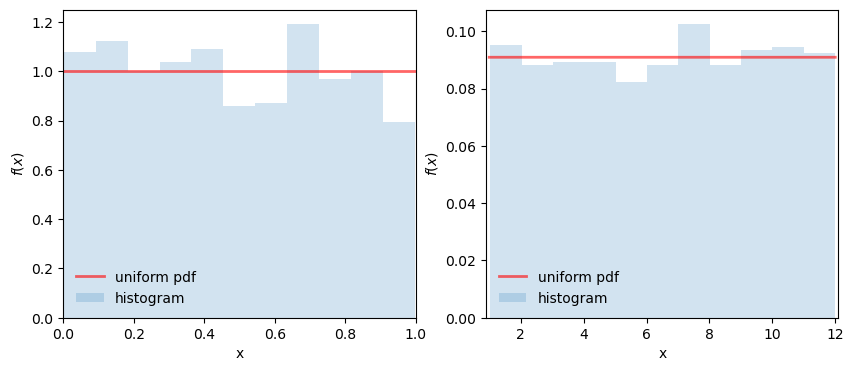

<Figure size 1000x10000 with 0 Axes>

In [1]:
from scipy.stats import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 4]
fig, ax = plt.subplots(1, 2)
plt.figure(figsize=(5, 50), dpi=200)
x = np.linspace(0, 1, 200)
ax[0].plot(x, uniform.pdf(x),
           'r-', lw=2, alpha=0.6, label='uniform pdf')
r = uniform.rvs(size=1000)
ax[0].hist(r, density=True, bins='auto',
           histtype='stepfilled', alpha=0.2, label='histogram')
ax[0].set_xlim([x[0], x[-1]])
ax[0].set_xlabel('x')
ax[0].set_ylabel('$f(x)$')
ax[0].legend(loc='best', frameon=False)
# con loc y scale
loc = 1
scale = 11
x = np.linspace(loc, loc + scale, 2000)
ax[1].plot(x, uniform.pdf(x, loc, scale),
           'r-', lw=2, alpha=0.6, label='uniform pdf')
r = uniform.rvs(size=1000, loc=loc, scale=scale)
ax[1].hist(r, density=True, bins='auto',
           histtype='stepfilled', alpha=0.2, label='histogram')
ax[1].set_xlim([x[0] - 0.1, x[-1] + 0.1])
ax[1].set_xlabel('x')
ax[1].set_ylabel('$f(x)$')
ax[1].legend(loc='best', frameon=False)
plt.show()


*Exponencial*

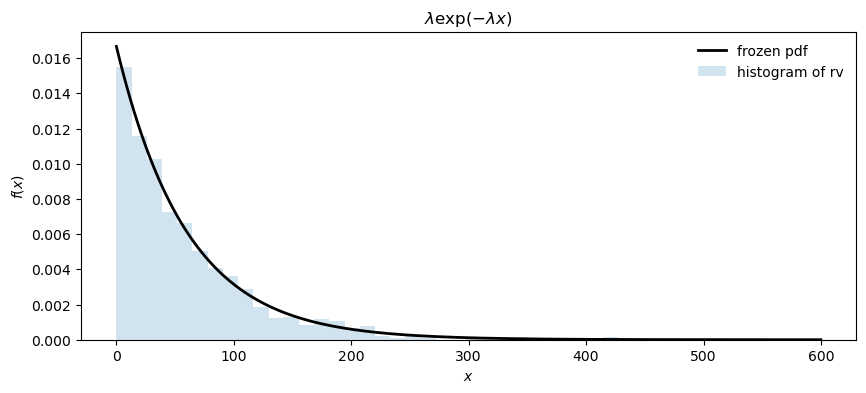

desviación estándar: 55.44;
media: 59.72


In [2]:
fig, ax = plt.subplots(1, 1)
λ = 1 / 60
x = np.linspace(0, 600, 200)
# variable aleatoria (random variate/variable, rv)
rv = expon(loc=0, scale=1 / λ)
# pdf a partir de la rv
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = rv.rvs(size=1000)
ax.hist(r, density=True, bins='auto',
        histtype='stepfilled', alpha=0.2, label='histogram of rv')
ax.legend(loc='best', frameon=False)
ax.set_title("$\\lambda\\exp(-\\lambda x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
plt.show()
print(f'desviación estándar: {np.std(rv.rvs(1000)).round(2)};\nmedia: {np.mean(rv.rvs(1000)).round(2)}')


*Normal*

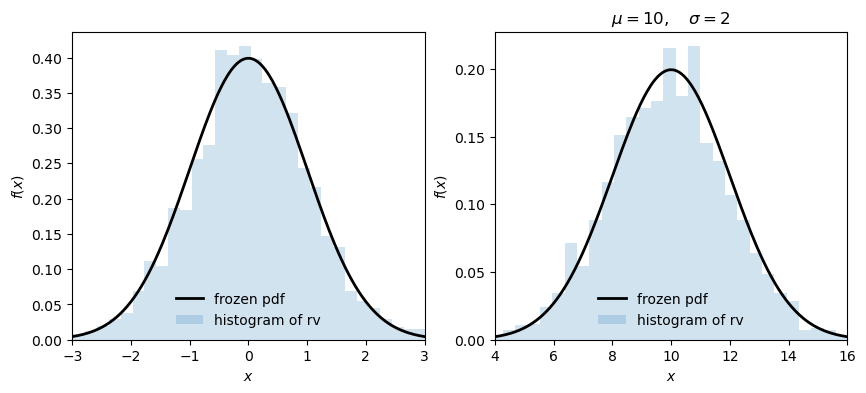

desviación estándar: 1.98


In [3]:
fig, ax = plt.subplots(1, 2)
x = np.linspace(-3, 3, 200)
rv = norm()
ax[0].plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax[0].hist(rv.rvs(size=2000), density=True, bins='auto', 
        histtype='stepfilled', alpha=0.2, label="histogram of rv")
ax[0].set_xlim([x[0], x[-1]])
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$f(x)$")
ax[0].legend(loc='best', frameon=False)
# con loc y scale diferentes
loc=10
scale=2
x = np.linspace(loc-3*scale, loc+3*scale, 200)
rv = norm(loc, scale)
ax[1].plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax[1].hist(rv.rvs(size=2000), density=True, bins='auto', 
        histtype='stepfilled', alpha=0.2, label="histogram of rv")
ax[1].set_xlim([x[0], x[-1]])
ax[1].set_title(f'$\\mu={{{loc}}},\\quad \\sigma={{{scale}}}$')
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$f(x)$")
ax[1].legend(loc='best', frameon=False)
plt.show()
# desviación estándar de n=1000
print(f'desviación estándar: {np.std(rv.rvs(1000)).round(2)}')


## ¿Por qué?

>**Modelos de probabilidad** ¿Cuál es la probabilidad de observar los *datos* dado los *parámetros* que conocemos?

>**Modelos estadísticos**:  ¿Cuáles son los valores más *plausibles* de los *parámetros* dado los *datos* que observamos? (Notar que no dice "más probables").

<figure>
<p align="center">
  <img src="img/2022-08-29-21-59-31.png" width='40%' />
      <figcaption>Probabildad vs estadística</figcaption>
</p>
</figure>

**Ejemplo:**
¿Cuán probable es que obtengamos 9 "Caras" (1) si lanzamos una moneda "justa" ( $p=0.5$ ) 10 veces? 

La pregunta es sobre 10 lanzamientos, y cada uno de ellos es un experimento aleatorio, que da lugar a una VA discreta cuyos valores solo pueden ser dos, $\{0,1\}$ (por ejemplo). A cada uno de estos lanzamientos le llamamos *ensayo de Bernoulli* (un ensayo con resultados de tipo éxito/fracaso).

La VA discreta que resulta de los 10 lanzamientos tiene *distribución binomial*, que se usa para modelar el número de éxitos (e.g., valores en los que $X=1$) en una muestra aleatoria *con reemplazo* de tamaño $n$. 

Su distribución es

$$
  p(k, n, \theta) = \Pr(X = k) = \binom{n}{k}\theta^k(1-\theta)^{n-k}
$$

En donde $\binom{n}{k}$ es el coeficiente binomial

$$
  \binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

$n$ es el tamaño de la muestra (el total de ensayos), $k$ el número de éxitos, y $\theta$ un parámetro de la distribución que define la probabilidad de éxito (y por lo tanto, define la forma de la distribución y el valor más probable). Por ejemplo, si nuestra moneda es justa, tendrá una $\theta=0.5$. 

La media de una distribución binomial es $n\times \theta$, esto significa que si lanzamos 10 veces una moneda con $\theta=0.5$, el valor más probable de éxitos será $0.5\times 10 = 5$.

En python podríamos obtener la probabilidad que buscamos de la siguiente manera:

In [4]:
k=9
n=10
p=0.5
binom.pmf(k, n, p).round(3)

0.01

Es decir, la probabilidad de tener 9 éxitos, dado que $\theta=0.5, n=10$, es de apenas ~0.01, una probabilidad muy baja.

¿Cuál sería la probabilidad de conseguir 6 éxitos bajo las mismas asunciones?

In [5]:
k=6
n=10
p=0.5
binom.pmf(k, n, p).round(3)


0.205

¿Y dos éxitos?

In [6]:
binom.pmf(2, n, p).round(3)

0.044

La distribución de la binomial con estos parámetros tiene la siguiente forma

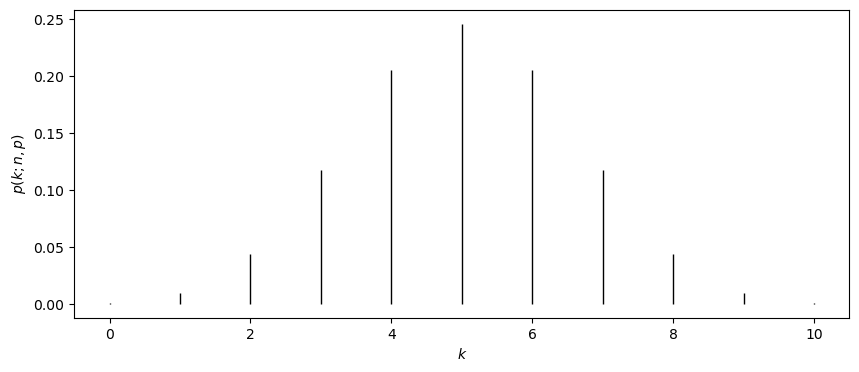

In [7]:
fig, ax = plt.subplots(1, 1)
n=10
p=0.5
k=np.arange(0, 11, 1)
rv = binom(n, p)
ax.vlines(k, 0, rv.pmf(k), colors='k', linestyles='-', lw=1)
ax.set_xlabel('$k$')
ax.set_ylabel('$p(k;n,p)$')
plt.show()

La probabilidad de 9 éxitos es menor a la probabilidad de 2 y de 6 éxitos.

Valgan estos dos ejemplos para asumir lo siguiente:

>Si la distribución tiene fijo un parámetro ($\theta=0.5$), es más probable una cantidad de éxitos que otra (e.g., 6 éxitos vs 9 éxitos).

Ahora, supongamos que desconocemos $\theta$, pero obtenemos 9 éxitos en 10 lanzamientos. 

1. ¿Hay alguna forma de estimar el valor de $\theta$ que originó, o pudo haber originado, este resultado? 
2. Si tenemos la hipótesis de que $\theta\neq 0.5$, ¿hay una forma en la que podamos obtener evidencia de esta hipótesis?

A ambas la respuesta es sí, pero para contestarlo, necesitamos la función de verosimilitud.

## Función de verosimilitud $L(\theta \mid \mathbf{x})$

La letra $L$ proviene de *likelihood*, que en español se traduce normalmente como verosimilitud o inlcuso como *credibilidad*. 

Si tenemos una muestra aleatoria $X_1, X_2, \dots, X_n$, la función de verosimilitud se define como la función de densidad conjunta

$$
  L(\theta \mid \mathbf{x}) = f(x_1, x_2, \dots, x_n;\theta)
$$

Abreviaremos $L(\theta\mid \mathbf{x})$ simplemente como $L(\theta)$

>Nota: *parece* que estamos definiendo la función de verosimilitud como la función de densidad conjunta, pero hay una diferencia importante. La función de densidad conjunta toma como fijo $\theta$, y lo que varía es $\mathbf{x}$, pero en la función de verosimilitud $\mathbf{x}$ ya fue observado, por lo que es fijo, y consideramos que $\theta$ varía sobre todos los posibles valores. 

Si $X_1, X_2, \dots, X_n$ son muestras independientes e idénticamente distribuidas (i.i.d), la función de densidad conjunta es

$$
  f(X_1, X_2, \dots, X_n \mid \theta)=f(X_1\mid \theta)\times f(X_2\mid \theta)\times\cdots \times f(X_n\mid \theta) = \prod_{i=1}^{n}f(X_i\mid \theta) \tag{1}
$$

Notar que la función de densidad conjunta es equivalente al producto de la función de densidad de cada variable. Esto proviene de la definición de independencia: $A$ y $B$ son independientes *sii* $P(A, B)=P(A)P(B)$.

Y la función de verosimilitud

$$
  L(\theta) = \prod_{i=1}^{n}f(X_i\mid \theta) \tag{2}
$$

Para algunos problemas, la función de log-verosimilitud, $\mathcal{l}(\theta)$ es más conveniente, dado que es más sencillo de trabajar con sumas que con productos y, además, la transformación logarítmica es monotónica.

$$
  \mathcal{l}(\theta) = \log \prod_{i=1}^{n}f(X_i\mid \theta) = \sum_{i=1}^{n}f(X_i\mid \theta)\tag{3}
$$

La función de verosimilitud puede ser usada para cuantificar la evidencia que tenemos en favor de una hipótesis. Retomando el ejemplo de lanzamientos de monedas, ¿qué tan *creíble* o verosímil es que 9 de 10 lanzamientos hayan sido caras (éxitos) *dado que* $\theta=0.5$? ¿Es menos, o más creíble, haber obtenido 9/10 con un $\theta=0.5$?

Obtendremos primero la verosimilitud $L(\theta=0.5)$ para esta distribución. 

Considera una muestra aleatoria de $n=10$ ensayos de Bernoulli $x_1,\dots, n_{10}$, cada uno con distribución

$$
  f(x) = \theta^x(1-\theta)^{1-x}\quad \text{ con } x = 0,1
$$

La función de verosimilitud es

$$
  L(\theta) =f(x_1,\ldots,x_{10};\theta)= \prod_{i=1}^n\theta^{x_i}(1-\theta)^{1-x_i}=
  \theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}
$$

Dado que $\sum_{i=1}^{10} x_i = 9$, y $n=10$, $L(\theta)=\theta^9(1-\theta)^{10-9}$

Para $\theta=0.5$, $L(\theta=0.5)=0.5^9(1-0.5)=0.00097$. 

Para $\theta=0.9$,$L(\theta=0.9)=0.9^9(1-0.9)=0.038$.

Si obtenemos la razón de ambas, $L(\theta_2)/L(\theta_1)$ obtenemos un valor que nos dice cuántas veces más verosímil es $\theta_2$ vs $\theta_1$.

Gráficamente se vería así

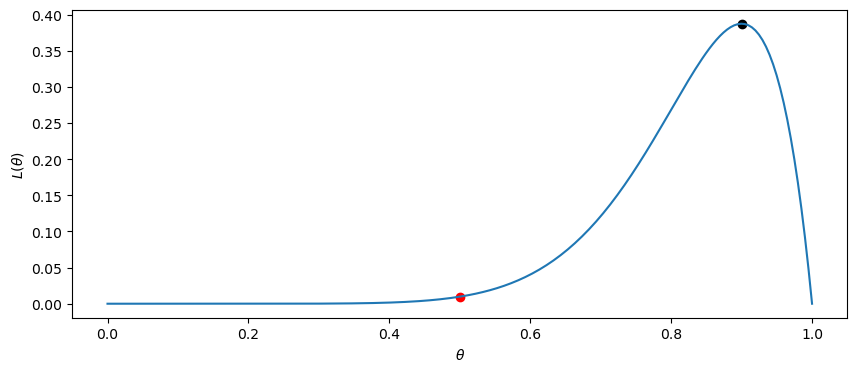

In [8]:
# éxitos obtenidos
k=9
# cantidad de ensayos
n=10
# hipótesis 1
p1=0.5
# hipótesis dos
p2=0.9
p_vec = np.linspace(0, 1, 200)
bin_like=binom.pmf(k, n, p_vec)
fig, ax = plt.subplots(1, 1)
ax.plot(p_vec, bin_like)
ax.scatter(p1, binom.pmf(k, n, p1), c='red')
ax.scatter(p2, binom.pmf(k, n, p2), c='black')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$L(\\theta)$')
plt.show()

# 3.2 Máxima verosimilitud

Hasta aquí la motivación del uso de las funciones de verosimilitud. Ahora veamos más formalmente la técnica para estimar parámetros, la estimación por máxima verosimilitud (EMV, y en inglés MLE). 

El problema de la MLE consiste en lo siguiente. Sea $X_1, X_2, \dots, X_n$ una muestra aleatoria de variables i.i.d. con distribución conjunta $L(\theta\mid X_1,\dots,X_n)$. El estimador de máxima verosimilitud de $\theta$ es la solución al problema de optimización

$$
  \theta^* = \argmax L(\theta\mid X_1,\dots,X_n ) \tag{4}
$$

En donde $\theta^*$ constituye el valor del argumento $\theta$ que maximiza $L$, es decir, el valor que maximiza la verosimilitud.

Caveat: este método impone una restricción fuerte, que es asumir que los datos siguen una distribución específica. 

## 3.2.1 MLE para binomial; obteniendo $\theta$

Como vimos gráficamente, $L$ para una binomial es cóncava. Podemos usar herramientas de cálculo para obtener $\theta^*$. Volvamos al ejemplo inicial, en donde usamos 10 lanzamientos y obtuvimos 9 éxitos. Vimos que podemos modelar este problema como 10 ensayos de Bernoulli independientes, que es lo mismo que una función de distribución Binomial.

$$
  p(X=k) = \binom{n}{k}\theta^k(1-\theta)^{n-k}
$$

La función de verosimilitud es la función de distribución conjunta. Para $X_1, X_2, \dots, X_n$ *i.i.d.*

$$
  L(\theta \mid X_1, X_2,\dots, X_n)=f(X_1, X_2, \dots, X_n\mid \theta) = \prod_{i=1}^nf(x_i\mid \theta)
$$

Y para la Binomial, como vimos, se convierte en 

$$
  L(\theta) = \theta^k (1-\theta)^{n-k}
$$

En donde $k$ son los éxitos, o $\sum_i x_i$. 

Si $L(\theta \mid X_1,...,X_n)$ es cóncava, el criterio de la primera derivada nos bastaría para encontrar $\theta^*$. Recordando la definición geométrica de la primera derivada, sabemos que encontramos un máximo o mínimo en donde la pendiente de una función es 0. Por lo tanto, queremos encontrar en dónde 

$$
  \frac{\text{d}L(\theta)}{\text{d}\theta}=0\tag{5}
$$

Antes de proseguir, podemos ver que en este caso transformar a $\log$ $L(\theta)$ podría simplificar las derivaciones. Dado que la transformación logarítmica es estrictamente creciente (monotónica), encontrar un máximo en $L$ es lo mismo que encontrarlo en $\log(L)$

$$
  \log(L(\theta)) = l(\theta) = \log \left [ \theta^k (1-\theta)^{n-k} \right]=\log\theta^k + \log(1-\theta)^{n-k}
$$

Ahora encontramos la primera derivada de $l(\theta)$

$$
  \frac{\text{d}l(\theta)}{\text{d}\theta} = \frac{\theta^k}{\text{d}\theta}+\frac{(1-\theta)^{n-k}}{\text{d}\theta}=k\text{d}\frac{\log(\theta)}{\text{d}\theta}+(n-k)\frac{\text{d}\log(1-\theta)}{\text{d}\theta}=\frac{k}{\theta}-\frac{n-k}{1-\theta}\tag{6}
$$

Igualar (6) a 0 y resolver para $\theta$.

$$
  \frac{k}{\theta}=\frac{1-\theta}{n-k}\Longrightarrow  n\theta-k\theta=k-k\theta\Longrightarrow n\theta=k\Longrightarrow \theta=\frac{k}{n}
$$

Dado que $k=\sum_i x_i$, es decir, la suma de los valores de $x_i$, entonces

$$
  \hat \theta = \frac{1}{n}\sum_{i=1}^nx_i \tag{7}
$$

En donde $\hat \theta$ es nuestro *sample proportion*, proporción muestral (por eso lleva el gorrito).

Para nuestor ejemplo, 

$$
  \hat\theta=\frac{9}{10}=0.9
$$

NOTA: El criterio de la primera derivada solo es una condición necesaria, no suficiente, para encontrar un máximo. Este método nos revela candidatos *posibles* a MLE.

### 3.2.2 Encontrando el MLE en Python para una binomial

Vamos a hacer una primera aproximación numérica usando grid-search

/tmp/ipykernel_1167988/1486032310.py:7: RuntimeWarning: divide by zero encountered in log
  return k * np.log(p) + (n - k) * np.log(1 - p) + np.log(m.comb(n, k))


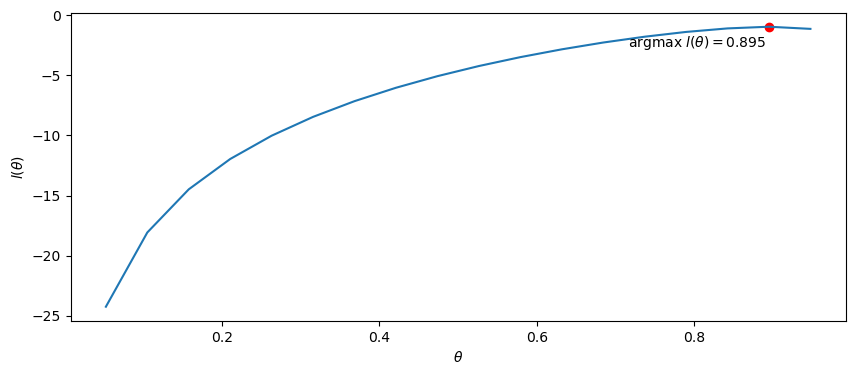

L(θ=0.5) = -4.63
L(θ=0.7) = -2.11
L(θ=0.9) = -0.95


In [9]:
import math as m
from scipy.optimize import minimize
from scipy.optimize import Bounds
# pmf para binomial

def binom_pmf(n, k, p):
    return k * np.log(p) + (n - k) * np.log(1 - p) + np.log(m.comb(n, k))

# optimización usando grid search
n = 10
k = 9
p = 0.5

step = 0.05
grid_vals = np.linspace(0, 1, int(1 / 0.05))
log_like = binom_pmf(n, k, p=grid_vals)
arg_max = np.argmax(log_like)
fig, ax = plt.subplots(1, 1)
ax.plot(grid_vals, log_like)
ax.scatter(grid_vals[arg_max], log_like[arg_max], c='red')
ax.text(grid_vals[arg_max] * 0.8, log_like[arg_max] * 2.8,
         s=f'argmax $ l(\\theta)={{{round(grid_vals[arg_max], 3)}}}$')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$l(\\theta)$')
plt.show()

# # Evaluate the log-likelihood function for some arbitrary values
binom_pmf(p=0.5, n=10, k=9)
binom_pmf(p=0.7, n=10, k=9)
print(
    f'L(θ=0.5) = {binom_pmf(p=0.5, n=10, k=9).round(2)}\n'+\
    f'L(θ=0.7) = {binom_pmf(p=0.7, n=10, k=9).round(2)}\n'+\
    f'L(θ=0.9) = {binom_pmf(p=0.9, n=10, k=9).round(2)}'
)

En la práctica, este método puede ser muy costoso. Imaginar, por ejemplo, que se tiene que hacer una búsqueda para estimar 2 parámetros. Tendríamos que hacer combinaciones del grid de ambos parámetros. Este suele ser el método de fuerza bruta que se usa, en ocasiones, como primera aproximación o cuando no nos funciona ninguna otra cosa.

Es más eficiente usar un algoritmo de optimización, como `minimize` de `scipy.optimize`. En vez de maximizar, minimizaremos, por lo que la función cóncava la convertiremos en convexa multiplicando por -1.

/tmp/ipykernel_1167988/1913075347.py:3: RuntimeWarning: divide by zero encountered in log
  ll = k * np.log(p) + (n - k) * np.log(1 - p) + np.log(m.comb(n, k))


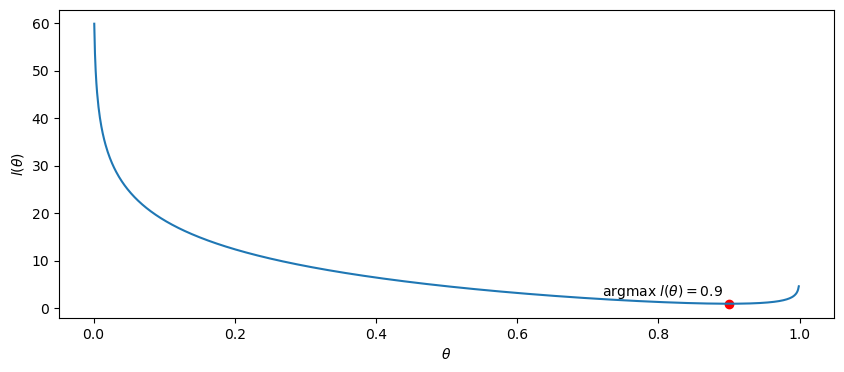

argmax = 0.9


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.9482446409204366
             x: [ 9.000e-01]
           nit: 18
          nfev: 36
 final_simplex: (array([[ 9.000e-01],
                       [ 8.999e-01]]), array([ 9.482e-01,  9.482e-01]))

In [10]:
# multiplicar por menos 1 la función de log-verosimilitud
def binom_pmf2(p, n, k):
    ll = k * np.log(p) + (n - k) * np.log(1 - p) + np.log(m.comb(n, k))
    return -ll
n = 10
k = 9
# valor inicial
theta = 0.2
# minimizar la función de log-verosimilitud negativa
# deben declararse los argumentos faltantes con args
# los argumentos son tomados en orden; theta es el p inicial
res = minimize(binom_pmf2, theta, args=(n, k),
               method='Nelder-Mead', bounds=[(0, 1)])

grid_vals = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(1, 1)
ax.plot(grid_vals, binom_pmf2(grid_vals, n, k))
ax.scatter(res.x, res.fun, c='red')
ax.text(res.x * 0.8, res.fun * 2.8,
         s=f'argmax $l(\\theta)={{{round(res.x[0], 3)}}}$')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$l(\\theta)$')
plt.show()

print(
    f'argmax = {res.x.round(3)[0]}'
)

# minimize with bounds using L-
res 

## 3.2 MLE

**Para normal; obteniendo $\mu$ con $\sigma$ conocida*

Si $L$ es diferenciable en $\theta_i$, candidatos posibles para MLE son los valores $(\theta_1^*, \theta_2^*, \dots, \theta_k^*)$ que son la solución a 

$$
  \frac{\partial L(\theta)}{\partial\theta}=0
$$

De nuevo, esto solo es una condición necesaria, no suficiente, para encontrar MLEs. Por ello menciono "candidatos posibles".

Sea $X_1, \dots, X_n$ una *i.i.d.* normalmente distribuida con media $\theta$ y varianza de 1, es decir $X_i \sim \mathcal{N}(\theta, 1)$, y sea $L(\theta)$ la función de verosimilitud 

$$
  L(\theta)=\prod_{i=1}^n\frac{1}{(2\pi)^{1/2}}\exp \left\{ -\frac{1}{2}(x_i-\theta)^2 \right\}=\frac{1}{(2\pi)^{n/2}}\exp \left\{ -\frac{1}{2}\left(\sum_{i=1}^n(x_i-\theta)\right)^2 \right\}
$$

Hallar $\theta^*=\argmax L(\theta)$

Pasos: 
1. log-transformar para obtener una versión más sencilla. 
2. Obtener $l'(\theta)$. 
3. Igualar a 0 y resolver para $\theta$.

Paso 1

$$
  l(\theta) = \log \left[ \frac{1}{(2\pi)^{n/2}}\exp \left\{ -\frac{1}{2}\left(\sum_{i=1}^n(x_i-\theta)\right)^2 \right\} \right]=\log\frac{1}{(2\pi)^{n/2}}+\log\left[\exp \left\{ -\frac{1}{2}\left(\sum_{i=1}^n(x_i-\theta)\right)^2 \right\}\right]
$$

Dado que $\log(\exp^x)=x$

$$
  l(\theta)=\log\frac{1}{(2\pi)^{n/2}}-\frac{1}{2}\left(\sum_{i=1}^n(x_i-\theta)\right)^2
$$

Paso 2

Ahora econtramos la primera derivada con respecto a $\theta$

$$
  l'(\theta)=\frac{\text{d}}{\text{d}\theta}\log\frac{1}{(2\pi)^{n/2}}-\frac{1}{2}\frac{\text{d}}{\text{d}\theta}\sum_{i=1}^n(x_i-\theta)^2
$$

Dado que el primer término no depende de $\theta$, se elimina. Para el segundo término, notando que una derivada de una sumatoria es la suma de sus derivadas, y usando la regla $du^n/du=ndu$ nos queda

$$
  l'(\theta)= 0 - \frac{1}{2}\left(2\sum_{i=1}^n(x_i-\theta)(-1)\right)=\sum_{i=1}^n(x_i-\theta)
$$

Paso 3

Ahora igualamos a 0y resolvemos para $\theta$

$$
  \sum_{i=1}^n(x_i-\theta)=0\Longrightarrow \sum_{i=1}^nx_i=\sum_{i=1}^n\theta
$$

Notar que la n-suma de una constante $\theta$ es $n\theta$.

$$
  \sum_{i=1}^nx_i=\sum_{i=1}^n\theta=n\theta\Longrightarrow \hat\theta=\frac{1}{n}\sum_{i=1}^nx_i
$$

---

**Ejercicio de práctica solos:**

Encontrar $\theta_1$ y $\theta_2$ tal que $\hat \theta_1=\bar x, \hat \theta_2 = \hat\sigma^2$ para la distribución normal

$$
  f(x_i;\theta_1, \theta_2)=\frac{1}{(\theta_2 2\pi)^{1/2}} \exp\left\{ -\frac{1}{2\theta_2}(x_i-\theta_1)^2 \right\}
$$

Nota: la distribución normal a veces es parametrizada con la desviación estándar, $\sigma$, y a veces con la varianza, $\sigma^2$. Esto se puede notar en los denominadores de ambos términos de la función que acabo de colocar.

---

**MLE para exponencial**

Sea $X_1, \dots, X_n$ una *i.i.d.* exponencial con media $\theta$, es decir $X_i \sim \text{Exp}(\theta)$, con pdf

$$
  f(x_i;\theta)=\theta\exp\{-\theta x_i\}
$$

y sea $L(\theta)$ la función de verosimilitud

$$
  L(\theta)=\prod_{i=1}^n\theta\exp\{-\theta x_i\}=\theta^n\exp\left\{-\theta\sum_{i=1}^nx_i\right\}
$$

Hallar $\theta^*=\argmax L(\theta)$. 

Paso 1. Log-transformar

$$
  l(\theta)=\log\left[\prod_{i=1}^n\theta\exp\{-\theta x_i\}\right]=\log\left[\theta^n\exp\left\{-\theta\sum_{i=1}^nx_i\right\}\right]=\log\theta^n-\theta\sum_{i=1}^nx_i
$$

Paso 2. Derivar

$$
  l'(\theta)=\frac{\text{d}}{\text{d}\theta}\log\theta^n-\theta\sum_{i=1}^nx_i=\frac{n}{\theta}-\sum_{i=1}^nx_i
$$

Paso 3. Igualar a 0 y resolver para $\theta$

$$
  \frac{n}{\theta}-\sum_{i=1}^nx_i=0\Longrightarrow \frac{n}{\theta}=\sum_{i=1}^nx_i\Longrightarrow \hat\theta=\frac{n}{\sum_{i=1}^nx_i}
$$

Notar que $\hat\theta$ es el inverso de $\bar x$. Esto es porque la exponencial se puede parametrizar de dos maneras: como la tasa, o rate, $\lambda$, o como la media, $\theta=1/\lambda$. En términos de rate, el MLE sería

$$
  \hat\lambda=\frac{1}{n}\sum_{i=1}^nx_i
$$


---

Ejercicio de MLE para la exponencial usando Python

In [11]:
# Generate some data

data = expon.rvs(scale=2, size=1000)

# Define the negative likelihood function for the exponential
def neg_log_likelihood(params, data):
    return -np.sum(np.log(expon.pdf(data, scale=params[0])))

# Minimize the negative log-likelihood function
# define the bounds for the parameter, lambda > 0
result = minimize(neg_log_likelihood, [1], args=(data,),
                  method='Nelder-Mead', 
                  bounds=[(0, np.inf)])

# Print the estimated parameter
print(f'Estimated scale: {result.x[0].round(3)}')
print(f'mean = {np.mean(data).round(3)}')

Estimated scale: 1.927
mean = 1.927


Text(0, 0.5, '$p(x;\\lambda)$')

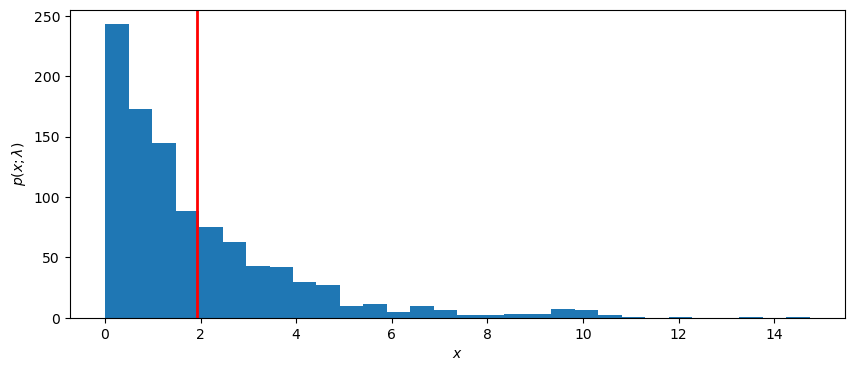

In [12]:
plt.hist(data, bins=30);
plt.axvline(result.x[0], c='red', lw=2)
plt.xlabel('$x$')
plt.ylabel('$p(x;\\lambda)$')

Si queremos saber qué tan frecuentemente podría ocurrir el parámetro que estimamos, podemos hacer una simulación de Monte Carlo. Esto es, simular muchos datos y ver cuántas veces el parámetro que estimamos aparece. En cada una de las simulaciones obtenemos la media ($\lambda_{sim}$) y luego graficamos la distribución de $\lambda_{sim}$.

1.9298083084398079

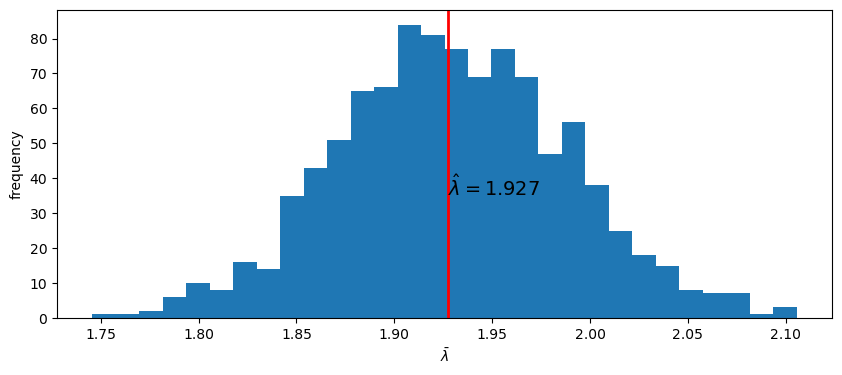

In [13]:
# simular n veces una exponencial con los parámetros estimados, obtener la media
# de cada simulación y graficar el histograma de las medias
n_sim = 1000
lambda_est = result.x[0]

for i in range(n_sim):
    data = expon.rvs(scale=lambda_est, size=1000)
    if i == 0:
        means = np.mean(data)
    else:
        means = np.append(means, np.mean(data))

plt.hist(means, bins=30);
plt.axvline(lambda_est, c='red', lw=2)
plt.text(lambda_est, 35, s=f'$\\hat\\lambda={lambda_est.round(3)}$', c='k', fontsize=14)
plt.xlabel('$\\bar{\\lambda}$')
plt.ylabel('frequency')
# la media de las medias es igual a la media de la muestra
np.mean(means)

**Ejemplo de un modelo de mezclas gaussianas**

Un modelo de mezcla gaussiana es un modelo probabilístico que supone que todos los puntos de datos se generan a partir de una mezcla de un número finito de pdfs gaussianas con parámetros desconocidos. El modelo se define matemáticamente de la siguiente manera:

$$ p(x; \mu_k, \Sigma_k, \pi_k) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x|\mu_k, \Sigma_k) $$

donde $x$ es un punto de datos, $\pi_k$ es el coeficiente de mezcla para la $k$-ésima componente gaussiana (en otras palabras, es la proporción del total de una mezcla que pertenece al $k$ componente), y debe sumar 1 (es decir, $\sum_{k=1}^n \pi_k = 1$); $\mu_k$ es la media de la $k$-ésima componente gaussiana, $\Sigma_k$ es la matriz de covarianza del $k$-ésimo componente gaussiano, y $\mathcal{N}(x|\mu_k, \Sigma_k)$ es la función de densidad de probabilidad de la distribución gaussiana multivariada con media $\mu_k$ y matriz de covarianza $\Sigma_k$. Si cada una de las $k$ componentes es univariada, el modelo se reduce a

$$ p(x;\mu_k, \sigma^2_k, \pi_k) = \pi_1 \mathcal{N}(x|\mu_1, \sigma_1^2) + \pi_2 \mathcal{N}(x|\mu_2, \sigma_2^2),\quad \text{con k=\{1, 2\}} $$

donde $x$ es un punto de datos, $\pi_1$ y $\pi_2$ son los coeficientes de mezcla de los dos componentes gaussianos, $\mu_1$ y $\mu_2$ son las medias de los dos componentes gaussianos y $\sigma_1 ^2$ y $\sigma_2^2$ son las varianzas de los dos componentes gaussianos.

Los parámetros $\mu_k, \sigma^2_k, \pi_k$ de un modelo de mezcla gaussiana se pueden estimar utilizando la estimación de máxima verosimilitud (MLE). La función de verosimilitud para un modelo de mezcla gaussiana está dada por:

$$ L(\theta) = \prod_{i=1}^{N} p(x_i|\theta) = \prod_{i=1}^{N} \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k) $$

donde $\theta=(\mu_k, \sigma^2_k, \pi_k)$ representa los parámetros del modelo, $x_i$ es el $i$-ésimo punto de datos y $N$ es el número total de puntos de datos. El enfoque MLE implica encontrar los valores de $\theta$ que maximizan la función de probabilidad $L(\theta)$.


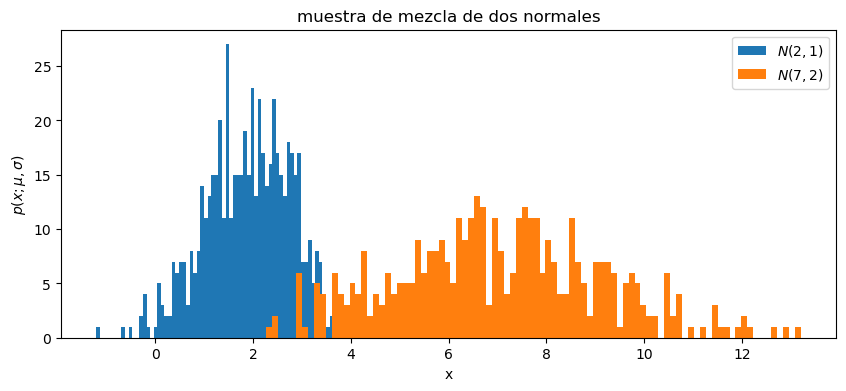

In [14]:
# Generar mezcla de dos distribuciones normales
np.random.seed(13)
n = 1000
mu1 = 2
mu2 = 7
sigma1 = 1
sigma2 = 2
# corresponden a pi_1 y pi_2
weights = [0.6, 0.4]
# cada muestra es una mezcla con tamaño n * pi_k, por lo que n = n * pi_1 + n * pi_2
samples1 = norm.rvs(loc=mu1, scale=sigma1, size=int(n * weights[0]))
samples2 = norm.rvs(loc=mu2, scale=sigma2, size=int(n * weights[1]))
samples = np.concatenate([samples1, samples2])

plt.hist(samples1, bins=90);
plt.hist(samples2, bins=90);
plt.xlabel('x')
plt.ylabel('$p(x; \mu, \sigma)$')
plt.title('muestra de mezcla de dos normales')
plt.legend(['$N(2,1)$', '$N(7,2)$'])

In [15]:
# Define the mixture model as a sum of two Gaussian distributions
def mixture_pdf(x, mu1, mu2, sigma1, sigma2, weight1):
    return weight1 * norm.pdf(x, mu1, sigma1) + (1 - weight1) * norm.pdf(x, mu2, sigma2)

# Define the negative log-likelihood function for the mixture model
def neg_log_likelihood(params, x):
    mu1, mu2, sigma1, sigma2, weight1 = params
    return -np.sum(np.log(mixture_pdf(x, mu1, mu2, sigma1, sigma2, weight1)))

# inicializar los parámetros
mu1_hat = 2
mu2_hat = 2
sigma1_hat = 1
sigma2_hat = 1
weight1_hat = 0.5
params = [mu1_hat, mu2_hat, sigma1_hat, sigma2_hat, weight1_hat]

# minimizar la función de log-verosimilitud negativa para encontrar los parámetros
# el argumento de bounds es una tupla de límites inferior y superior para cada parámetro
res = minimize(neg_log_likelihood, params,
               args=(samples,), method='Nelder-Mead',
               bounds=((None, None), (None, None), (0, None), (0, None), (0, 1)))

# Print the estimated parameters and log-likelihood
print(f'Estimated mu1: {res.x[0].round(3)}')
print(f'Estimated mu2: {res.x[1].round(3)}')
print(f'Estimated sigma1: {res.x[2].round(3)}')
print(f'Estimated sigma2: {res.x[3].round(3)}')
print(f'Estimated weight1: {res.x[4].round(3)}')

Estimated mu1: 7.032
Estimated mu2: 1.982
Estimated sigma1: 2.143
Estimated sigma2: 0.947
Estimated weight1: 0.396


Ahora graficamos la mezcla con los parámetros que encontramos con MLE

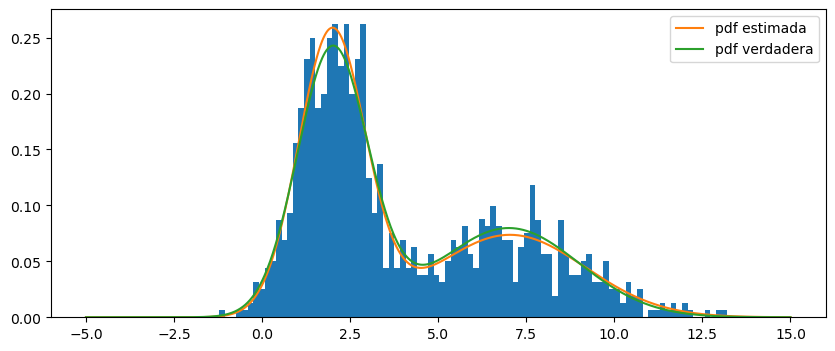

In [16]:
# Evaluamos el pdf de la mezcla con los parámetros estimados en un grid
# usando np.linspace(-5, 15, 1000) generamos 1000 valores equiespaciados entre -5 y 15
# y metemos los parámetros estimados en res.x en el orden en que aparecen en la función
pdf_mezcla = mixture_pdf(np.linspace(-5, 15, 1000), *res.x)
plt.hist(samples, bins=90, density=True);
plt.plot(np.linspace(-5, 15, 1000), pdf_mezcla)
# ahora usaremos los parámetros verdaderos
plt.plot(np.linspace(-5, 15, 1000), mixture_pdf(np.linspace(-5, 15, 1000), mu1, mu2, sigma1, sigma2, weights[0]))
plt.legend(['pdf estimada', 'pdf verdadera'])

Podemos ver que la mezcla de dos gaussianas es una buena aproximación a los datos, dado que la función con los parámetros estimados casi se sobrepone a la función de los parámetros verdaderos.

Este mismo método se puede usar para estimar los parámetros de un problema de clustering, que veremos más tarde. Un cluster es un conjunto de puntos de datos que son similares entre sí. El problema de clustering es encontrar grupos de puntos de datos que son similares entre sí, es decir, en un cluster podemos asumir que los datos provienen de la misma distribución bivariada. El problema de clustering se puede resolver usando un modelo de mezcla gaussiana, donde cada componente gaussiana representa un cluster. El número de componentes gaussianas en el modelo de mezcla gaussiana es igual al número de clusters. El problema de clustering se puede resolver usando el método de máxima verosimilitud (MLE) para estimar los parámetros del modelo de mezcla gaussiana. El método MLE implica encontrar los valores de los parámetros que maximizan la función de probabilidad de los datos. 

# Ejemplo de mezcla de exponencial y normal

Supongamos que tengo el siguiente problema: tengo un hotel y tengo dos tipos de huéspedes probables: huéspedes ejecutivos (CEOs, abogados de una firma, políticos) vs. huéspedes de vacaciones (mochileros o familias). El primer tipo de huéspedes es más probable que paguen más dinero porque necesitan el servicio con más urgencia y suelen reservar con poco tiempo, mientras que el segundo tipo es mucho más anticipado y los periodos entre la reserva y la llegada al hotel son mayores. 

El problema es implementar un procedimiento para decidir de manera óptima qué precio fijar a los huéspedes. Imaginar que puedo dividir la distribución de los días de reserva en dos, donde los períodos más pequeños pueden clasificarse como "ejecutivos" y los períodos más largos como "turistas", y esta distribución de probabilidad se puede utilizar junto con el precio de la reserva. Este precio se puede modelar como un modelo de caída exponencial en función de los días de reserva. Ahora bien, ¿cómo puedo proceder para encontrar el precio óptimo?

Podemos ajustar un modelo de mezclas de dos distribuciones, pero antes necesitamos saber qué distribuciones son. Luego de ajustar el modelo de distribuciones, podemos usar la probabilidad de que se trate de un tipo de huésped u otro para calcular el precio esperado de la reserva. Finalmente, podemos usar técnicas de optimización para encontrar el precio que maximice el ingreso esperado.

1. Recopilar datos: recopilar datos sobre los días de reserva y los precios para los dos tipos diferentes de huéspedes. Con base en los histogramas, escoger dos distribuciones que se ajusten a los datos.

2. Ajustar las distribuciones: estimar los parámetros de las distribuciones para ambos tipos de invitados utilizando MLE. Tendrás dos parámetros de tarifas, uno para ejecutivos y otro para vacacionistas.

3. Función de ingresos del modelo: escribir una función de ingresos basada en el modelo de precios y los parámetros de distribución exponencial estimados. Deberá considerar la probabilidad de cada tipo de huésped y cómo cambia el precio con los días de reserva.

4. Optimizar precio: utilice técnicas de optimización para encontrar el precio que maximice la función de ingresos.

El modelo de precio que usaremos es exponencial con dos parámetros: precio de base y tasa de decaimiento. El precio de base es el precio que se cobra por una reserva de un día y la tasa de decaimiento es la tasa a la que disminuye el precio por día de reserva. El precio de una reserva de $n$ días se puede calcular como

$$
  P(n) = P_0 \exp(-\lambda n)
$$

donde $P_0$ es el precio base y $\lambda$ es la tasa de decaimiento. El precio de una reserva de un día es $P_0$, el precio de una reserva de dos días es $P_0 \exp(-\lambda)$, el precio de una reserva de tres días es $P_0 \exp(-2\lambda)$, y así sucesivamente. La tasa de decaimiento $\lambda$ nos dice cuánto disminuye el precio por día de reserva. Por ejemplo, si $\lambda=0.1$, el precio de una reserva de dos días es $P_0 \exp(-0.1) = 0.9 P_0$, el precio de una reserva de tres días es $P_0 \exp(-0.2) = 0.81 P_0$, y así sucesivamente.


El precio base óptimo y la tasa de caída óptima brindan información sobre cómo debe fijar el precio de sus habitaciones para maximizar los ingresos, teniendo en cuenta la distribución de probabilidad de los diferentes tipos de huéspedes (ejecutivos y turistas).

### Precio base óptimo
El "precio base óptimo" es el precio que cobraría por una habitación si un huésped la reserva el mismo día que desea quedarse (el día de reserva es 0). Sirve como punto de referencia para fijar precios de habitaciones para fechas futuras. Por ejemplo, si el precio base óptimo es $250, entonces este es el precio que idealmente le cobraría a un huésped que necesita una habitación de inmediato.

### Tasa de decadencia óptima
La "tasa de caída óptima" describe cómo el precio de la habitación debería disminuir a medida que aumenta el tiempo entre la reserva y la estancia real. En este contexto, la tasa de caída se aplica exponencialmente al precio base.

El modelo de precios utilizado aquí es:
$$ \text{Precio} = \text{Precio base} \times e^{-\text{Tasa de caída} \times \text{Días de reserva}} $$

- Una tasa de caída más alta significa que el precio baja más rápidamente a medida que aumenta el tiempo entre la reserva y la estancia. Esto podría fomentar más reservas anticipadas por parte de los turistas.
  
- Una tasa de caída más baja significa que el precio disminuye lentamente, lo que podría fomentar más reservas de última hora, normalmente por parte de ejecutivos.

Así es como se interpretan los parámetros en un contexto empresarial:

- **Precio base óptimo**: Este es el precio más alto que puedes cobrar, generalmente dirigido a huéspedes que reservan en el último minuto. Los ejecutivos que tienen necesidades urgentes tienen más probabilidades de pagar este precio.
  
- **Tasa de caída óptima**: esto indica qué tan rápido debes bajar el precio a medida que la fecha de la reserva se aleja del día de la estadía. Una tasa de caída bien ajustada garantiza que se puedan capturar los mayores ingresos posibles de los vacacionistas que son sensibles a los precios y reservan con mucha antelación, sin perder a los ejecutivos dispuestos a pagar más por reservas de último momento.

Al optimizar estos dos parámetros, maximiza los ingresos esperados al equilibrar las necesidades y comportamientos de ambos tipos de huéspedes. Estos conocimientos deberían ser valiosos para ilustrar a sus estudiantes cómo se pueden aplicar conceptos estadísticos y de optimización abstractos en escenarios de toma de decisiones basados en datos del mundo real.


Podemos formular la función de ingresos esperados como un problema de optimización matemática. El objetivo es maximizar los ingresos esperados ajustando el precio base y la tasa de caída. Así es como se traduce:

### Parámetros

- $P$: Precio base
- $D$: Tasa de decadencia.
- $w$: Coeficiente de mezcla para invitados ejecutivos
- $\lambda$: Parámetro de tarifa para la distribución exponencial (huéspedes ejecutivos)
- $\mu$: Media para la distribución normal (huéspedes vacacionistas)
- $\sigma$: Desviación estándar para la distribución normal (huéspedes vacacionistas)
- $t$: Día de la reserva

### Probabilidades
1. Función de densidad de probabilidad (PDF) conjunta para reservas de huéspedes ejecutivos el día $t$:
$$ p(t, {\text{ejec}}) = w \times \frac{1}{\lambda} e^{-\frac{t}{\lambda}} $$
   
2. PDF para la reserva de huéspedes vacacionistas el día $t$:
$$ p(t,{\text{vaca}}) = (1 - w) \times \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(t - \ mu)^2}{2\sigma^2}} $$
  
3. Probabilidad posterior de que un día de reserva pertenezca a un ejecutivo. Está dado por el teorema de Bayes:

$$
p(\text{ejec}\mid t) = \frac{p(t,\text{ejec})}{p(t,\text{ejec}) + p(t,\text{vaca})} = \frac{p(t,\text{ejec})}{p(t)}
$$

Recordar que $p(t,\text{ejec})$ es `w * expon.pdf(booking_day, scale=1/opt_params['executive_rate'])`, en donde `w` es $p(\text{ejec})$ y `expon.pdf` es la condicional $p(t\mid \text{ejec})$.

$p(t)$ por otro lado es la probabilidad marginal de $t$, que se obtiene sumando las probabilidades de que $t$ sea ejecutivo y vacacionista:

$$
p(t) = p(t,\text{ejec}) + p(t,\text{vaca})
$$

En donde $p(t,\text{vaca})$ es `(1 - w) * norm.pdf(booking_day, loc=mu, scale=sigma)`, en donde `(1 - w)` es $p(\text{vaca})$ y `norm.pdf` es la condicional $p(t\mid \text{vaca})$.

### Los ingresos esperados

En teoría de decisión bajo incertidumbre, una utilidad esperada es una utilidad multiplicada por la probabilidad de que ocurra un evento. La utilidad esperada de una reserva de un día es la suma de los ingresos esperados de un huésped ejecutivo y un huésped de vacaciones:

$$
R_{\text{total}}(t) = R_{\text{ejec}}(t) + R_{\text{vaca}}(t) = P \times e^{-D \times t} \times p(\text{ejec}\mid t) + P \times e^{-D \times t} \times [1 - p(\text{ejec}\mid t)]
$$

¿Por qué multiplicamos por una probabilidad? Dado que es un resultado incierto, asumimos que de repetir el experimento muchas veces, la utilidad esperada es el promedio de los resultados. Por poner un ejemplo, supongamos que si lanzamos una moneda y cae H ganamos 10, y si cae T, ganamos 2. La utilidad esperada de lanzar la moneda es $ 0.5 \times 10 + 0.5 \times 2 = 6 $. En un escenario en donde para entrar a esa lotería tenemos que pagar 5 podríamos decidir, dadas nuestras preferencias, si entrar (y tener una ganancia de 1 en promedio) o no entrar (ganancia de 0).

1. Ingresos esperados de un huésped ejecutivo para un día de reserva determinado $t$:
$$ R_{\text{ejec}}(t) = P \times e^{-D \times t} \times p(\text{ejec}\mid t) $$

2. Ingresos esperados de un huésped de vacaciones para un día de reserva determinado $t$:
$$ R_{\text{vaca}}(t) = P \times e^{-D \times t} \times [1 - p(\text{ejec}\mid t)] $$

### Función objetiva
La función objetivo a maximizar es la suma de los ingresos esperados:
$$ \text{Maximizar } \Big\{ R_{\text{total}}(t)  \Big\} \rightarrow \text{Minimizar} \Big\{-\left[R_{\text{ejec}}(t) + R_{\text{vaca}}(t)\right]\Big\} $$

Tenga en cuenta que la función devuelve el negativo del ingreso esperado porque las rutinas de optimización a menudo minimizan las funciones, por lo que lo negamos para convertir nuestro problema de maximización en un problema de minimización.

Al optimizar esta función objetivo con respecto a $P$ y $D$, puede encontrar los valores que maximizan sus ingresos esperados para un día de reserva determinado $t$, teniendo en cuenta las distribuciones de probabilidad de sus diferentes tipos de invitados.

### Optimización de la función objetivo

In [17]:
import numpy as np
import pandas as pd
# Simulate data
np.random.seed(0)
executive_days = np.random.exponential(10, 1000)
vacationer_days = np.random.normal(120,30, 1000)
all_days = np.concatenate([executive_days, vacationer_days])
# save data to a dataframe
df = pd.DataFrame({'days': all_days, 'group': ['executive'] * 1000 + ['vacationer'] * 1000})
# save in csv
data_path = '/home/mrrobot/Documents/GitHub/AEM-ITESO/datasets/'
df.to_csv(data_path + 'booking_days.csv', index=False)

In [18]:
from scipy.stats import norm, expon
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/jealcalat/AEM-ITESO/main/datasets/booking_days.csv"

data = pd.read_csv(url)['days']

all_days = data.values

Text(0, 0.5, 'density')

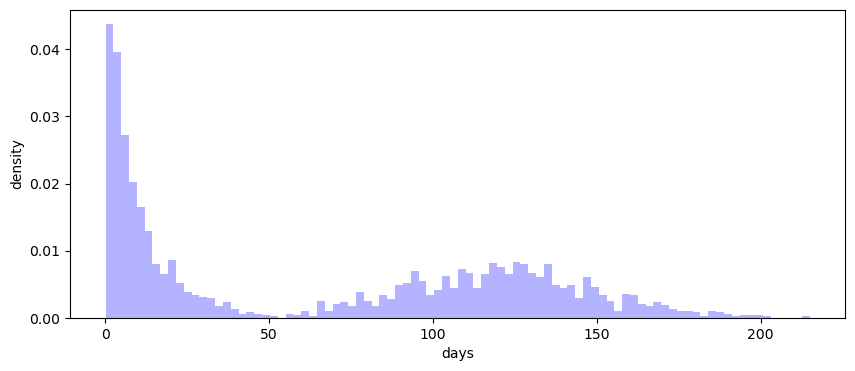

In [19]:
plt.hist(all_days, bins=90, density=True, color='#B3B3FF', label='data');
plt.xlabel('days')
plt.ylabel('density')

In [20]:
# MLE for mixture model
def neg_log_likelihood(params):
    rate, mean, std, w = params
    ll_exec = np.log(expon.pdf(all_days, scale=1/rate))
    ll_vacation = np.log(norm.pdf(all_days, mean, std))
    total_ll = np.log(np.exp(ll_exec) * w + np.exp(ll_vacation) * (1-w))
    return -total_ll.sum()

# Optimize to find parameters
result = minimize(neg_log_likelihood, [0.1, 100, 10, 0.5], bounds=[(0.001, 2), (30, 180), (1, 30), (0, 1)])
opt_params = {'executive_rate': result.x[0], 'vacationer_mean': result.x[1], 'vacationer_std': result.x[2], 'w': result.x[3]}

print(f'Estimated executive rate: {opt_params["executive_rate"].round(3)}')
print(f'Estimated vacationer mean: {opt_params["vacationer_mean"].round(3)}')
print(f'Estimated vacationer std: {opt_params["vacationer_std"].round(3)}')

Estimated executive rate: 0.101
Estimated vacationer mean: 120.727
Estimated vacationer std: 29.13


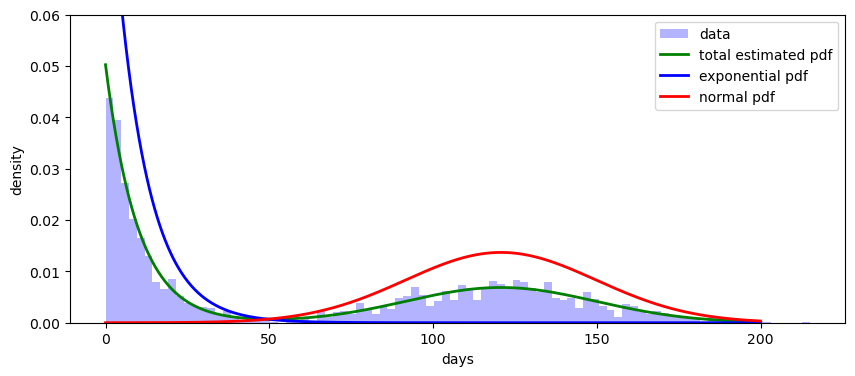

In [21]:
import matplotlib.pyplot as plt
# plot the estimated pdf and the histogram of the data
plt.hist(all_days, bins=90, density=True, color='#B3B3FF', label='data');
x = np.linspace(0, 200, 1000)
rate = opt_params['executive_rate']
mean = opt_params['vacationer_mean']
std = opt_params['vacationer_std']
est_pdf = opt_params['w'] * expon.pdf(x, scale=1/rate) + (1 - opt_params['w']) * norm.pdf(x, mean, std)
plt.plot(x, est_pdf, 'g-', label='total estimated pdf', lw=2)
# plot estimated exponential pdf
plt.plot(x, expon.pdf(x, scale=1/rate), 'b-', label='exponential pdf', lw=2)
# plot estimated normal pdf
plt.plot(x, norm.pdf(x, mean, std),'r-', label='normal pdf', lw=2)
plt.ylim([0, 0.06])
plt.xlabel('days')
plt.ylabel('density')
plt.legend() 

**Ejercicio en clase**

¿Dado un día de reserva $t$, cuál es la probabilidad de que sea un ejecutivo? ¿De que sea un vacacionista? 10 minutos

Podemos predecir la probabilidad de que sea un ejecutivo o un turista. Esto toma la forma de una probabilidad condicional, es decir, la probabilidad de que sea un ejecutivo dado que el día de reserva es $t$:

$$
p(\text{ejec}\mid t) = \frac{p(t,\text{ejec})}{p(t,\text{ejec}) + p(t,\text{vaca})} = \frac{p(t,\text{ejec})}{p(t)}
$$

In [39]:
# probability of being vacationer for 60 and 30 days

x = np.array([100, 60, 50, 30, 12])
w = opt_params['w']
prob_exec = w * expon.pdf(x, scale=1/opt_params['executive_rate'])
prob_vacation = (1-w) * norm.pdf(x, opt_params['vacationer_mean'], opt_params['vacationer_std'])
posterior_prob_exec = prob_exec / (prob_exec + prob_vacation)
posterior_prob_exec.round(3)

array([0.   , 0.132, 0.475, 0.979, 1.   ])

Dados 60 y 30 días, la probabilidad de que sea un ejecutivo es de 0.13 y 0.98, respectivamente. La probabilidad de que sea un vacacionista es de 0.87 y 0.02, respectivamente.

In [41]:
posterior_prob_vaca = prob_vacation / (prob_exec + prob_vacation)
posterior_prob_vaca.round(3)

array([1.   , 0.868, 0.525, 0.021, 0.   ])

In [22]:
# Expected revenue function
def expected_revenue(price_params, booking_day, opt_params):
    base_price, decay_rate = price_params
    w = opt_params['w']
    prob_exec = w * expon.pdf(booking_day, scale=1/opt_params['executive_rate'])
    prob_vacation = (1-w) * norm.pdf(booking_day, opt_params['vacationer_mean'], opt_params['vacationer_std'])
    posterior_prob_exec = prob_exec / (prob_exec + prob_vacation)
    
    revenue_exec = base_price * np.exp(-decay_rate * booking_day) * posterior_prob_exec
    revenue_vacation = base_price * np.exp(-decay_rate * booking_day) * (1 - posterior_prob_exec)
    return -(revenue_exec + revenue_vacation)  # Negative for minimization

# Optimize price for a new booking day (e.g., 50 days)
result = minimize(expected_revenue, [200, 0.1], args=(50, opt_params), bounds=[(100, 300), (0.01, 0.5)])
optimal_price_params = result.x

print("Optimal base price:", optimal_price_params[0])
print("Optimal decay rate:", optimal_price_params[1])

Optimal base price: 300.0
Optimal decay rate: 0.01


In [56]:
(1- np.exp(-optimal_price_params[1])) * 100

0.9950166250831893

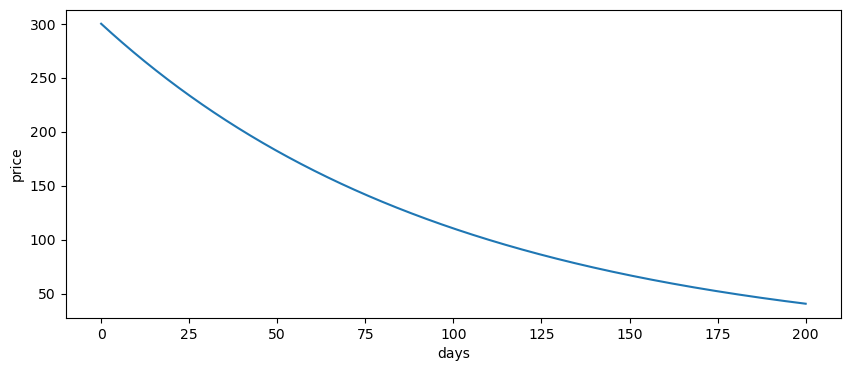

In [25]:
# simulate the price function with optimal parameters
x = np.linspace(0, 200, 1000)
y = optimal_price_params[0] * np.exp(-optimal_price_params[1] * x)
plt.plot(x, y)
plt.xlabel('days')
plt.ylabel('price')
plt.show()

¿Cuál será mi precio si reservo con 60 días de anticipación? ¿Y si reservo con 30 días de anticipación? 

In [30]:
# price for booking days

x = np.array([60, 50, 30])

optimal_price_params[0] * np.exp(-optimal_price_params[1] * x)

array([164.64349083, 181.95919791, 222.2454662 ])

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from scipy.optimize import minimize
import statsmodels.api as sm
import pandas as pd
# Load the breast cancer dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

# Adding a constant term for the intercept
X = sm.add_constant(X)

# Logistic likelihood function
def neg_log_likelihood(beta, X, y):
    p = 1 / (1 + np.exp(-np.dot(X, beta))+ 1e-100) 
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# Initial guess
beta_init = np.zeros(X.shape[1])

# Perform optimization to find the beta that minimizes the negative log likelihood

result = minimize(neg_log_likelihood, beta_init, args=(X, y), method="BFGS")

print("Estimated parameters:", result.x)


In [34]:
import matplotlib.pyplot as plt

# plot the breast cancer data
plt.scatter(X[:, 1], X[:, 2], c=y)

InvalidIndexError: (slice(None, None, None), 1)

/tmp/ipykernel_227844/2057842480.py:54: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(x, y, rv1.pdf(pos), colors='blue', alpha=0.5, label='Gaussian 1')
/tmp/ipykernel_227844/2057842480.py:57: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(x, y, rv2.pdf(pos), colors='red', alpha=0.5, label='Gaussian 2')
/tmp/ipykernel_227844/2057842480.py:60: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(x, y, pi_1 * rv1.pdf(pos) + pi_2 * rv2.pdf(pos), colors='green', alpha=0.5, label='GMM')


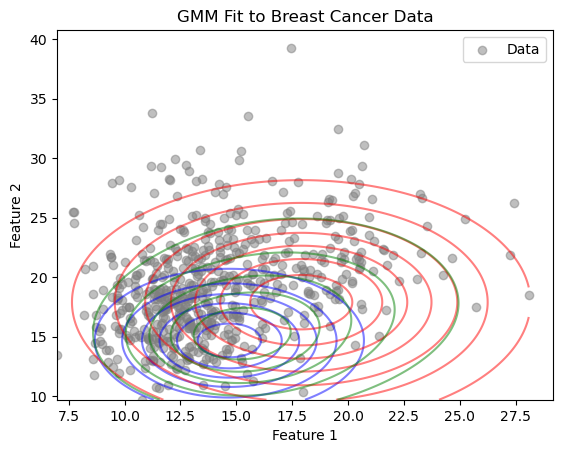

Estimated parameters: [14.68838424 17.9032383   9.55241986 25.67125647  0.3716392 ]


In [ ]:
# plot histogram of first feature
from scipy.optimize import minimize
import numpy as np
from sklearn.datasets import load_breast_cancer
from scipy.stats import multivariate_normal

# Load the data
data = load_breast_cancer()
X = data.data[:, :2]  # Using only the first two features

# Negative Log-Likelihood Function for 2-component GMM
def gmm_neg_log_likelihood(params):
    mu1, mu2, sigma1, sigma2, pi_1 = params
    pi_2 = 1 - pi_1
    
    # Compute the PDF of each component
    rv1 = multivariate_normal([mu1, mu1], [[sigma1, 0], [0, sigma1]])
    rv2 = multivariate_normal([mu2, mu2], [[sigma2, 0], [0, sigma2]])
    
    # Overall PDF (mixture of the two components)
    mixed_rv = pi_1 * rv1.pdf(X) + pi_2 * rv2.pdf(X)
    
    # Calculate the negative log-likelihood
    neg_log_likelihood = -np.sum(np.log(mixed_rv))
    
    return neg_log_likelihood

# Initial parameter guess [mu1, mu2, sigma1, sigma2, pi_1]
initial_params = [10, 20, 5, 5, 0.5]

# Perform MLE optimization
result = minimize(gmm_neg_log_likelihood, initial_params, bounds=[(None, None), (None, None), (0.1, None), (0.1, None), (0.01, 0.99)])
estimated_params = result.x
estimated_params = result.x
mu1, mu2, sigma1, sigma2, pi_1 = estimated_params
pi_2 = 1 - pi_1
# Generate grid for contour plot
x, y = np.mgrid[np.min(X[:, 0]):np.max(X[:, 0]):.1, np.min(X[:, 1]):np.max(X[:, 1]):.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

# Create the Gaussian components and mixture model
rv1 = multivariate_normal([mu1, mu1], [[sigma1, 0], [0, sigma1]])
rv2 = multivariate_normal([mu2, mu2], [[sigma2, 0], [0, sigma2]])

# Plotting
fig, ax = plt.subplots()

# Plot scatter plot of original data
ax.scatter(X[:, 0], X[:, 1], c='grey', alpha=0.5, label='Data')

# Plot contour of the first Gaussian component
ax.contour(x, y, rv1.pdf(pos), colors='blue', alpha=0.5, label='Gaussian 1')

# Plot contour of the second Gaussian component
ax.contour(x, y, rv2.pdf(pos), colors='red', alpha=0.5, label='Gaussian 2')

# Plot contour of the Gaussian mixture model
ax.contour(x, y, pi_1 * rv1.pdf(pos) + pi_2 * rv2.pdf(pos), colors='green', alpha=0.5, label='GMM')

ax.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GMM Fit to Breast Cancer Data')
plt.show()
print(f"Estimated parameters: {estimated_params}")


### 1. Gaussian Mixture Model (GMM)

A Gaussian Mixture Model (GMM) is a probabilistic model that assumes the data is generated from a mixture of several Gaussian distributions. Mathematically, the probability density function $f(x)$ of a GMM with $K$ components in $D$-dimensional space is defined as:

$$
f(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)
$$

Here:

- $x$ is a $D$-dimensional data point.
- $\pi_k$ is the mixing coefficient for the $k^{th}$ Gaussian component, with $0 \leq \pi_k \leq 1$ and $\sum_{k=1}^{K} \pi_k = 1$.
- $\mathcal{N}(x | \mu_k, \Sigma_k)$ is the $D$-dimensional Gaussian distribution with mean vector $\mu_k$ and covariance matrix $\Sigma_k$.

### 2. Method of Maximum Likelihood Estimation (MLE) for GMM

To fit a GMM to data, we often use the method of Maximum Likelihood Estimation (MLE) to estimate the model parameters $\theta = \{\pi_1, \pi_2, \ldots, \pi_K, \mu_1, \mu_2, \ldots, \mu_K, \Sigma_1, \Sigma_2, \ldots, \Sigma_K\}$.

#### Objective Function

The objective is to maximize the log-likelihood function $\mathcal{L}(\theta)$, given as:

$$
\mathcal{L}(\theta) = \sum_{n=1}^{N} \log \left( \sum_{k=1}^{K} \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k) \right)
$$

Here $N$ is the number of data points $x_n$.

#### Optimization

We usually use iterative optimization algorithms to maximize $\mathcal{L}(\theta)$, like the Expectation-Maximization (EM) algorithm, which alternates between:

- **E-step**: Computing the posterior probabilities of the components given the data.
  
$$
w_{nk} = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)}
$$

- **M-step**: Updating the parameters to maximize the expected log-likelihood computed in the E-step.

$$
\mu_k = \frac{\sum_{n=1}^{N} w_{nk} x_n}{\sum_{n=1}^{N} w_{nk}}, \quad \Sigma_k = \frac{\sum_{n=1}^{N} w_{nk} (x_n - \mu_k)(x_n - \mu_k)^T}{\sum_{n=1}^{N} w_{nk}}, \quad \pi_k = \frac{\sum_{n=1}^{N} w_{nk}}{N}
$$

By iterating between these two steps, the EM algorithm converges to a local maximum of the log-likelihood function.

Note that you can also use numerical optimization techniques, such as gradient ascent or quasi-Newton methods, to directly maximize the log-likelihood function, especially when the EM algorithm is difficult to apply due to constraints on the parameters or other complexities.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.datasets import load_breast_cancer
from scipy.optimize import minimize

# Load the data
data = load_breast_cancer(as_frame=True)
y = data.target
data = data.data

data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


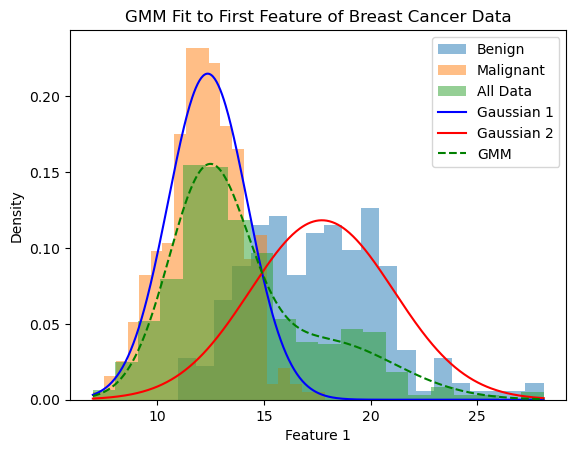

In [ ]:
# use only the first feature
X = data.iloc[:, 0]

# Negative Log-Likelihood Function for 2-component GMM
def gmm_neg_log_likelihood(params):
    mu1, mu2, sigma1, sigma2, pi_1 = params
    pi_2 = 1 - pi_1

    rv1 = norm(loc=mu1, scale=sigma1)
    rv2 = norm(loc=mu2, scale=sigma2)

    mixed_rv = pi_1 * rv1.pdf(X) + pi_2 * rv2.pdf(X)
    
    neg_log_likelihood = -np.sum(np.log(mixed_rv))
    return neg_log_likelihood

# Initial parameter guess [mu1, mu2, sigma1, sigma2, pi_1]
initial_params = [10, 20, 5, 5, 0.5]
# bounds of the parameters
bounds = [(None, None), (None, None), (0.1, None), (0.1, None), (0.01, 0.99)]
# Perform MLE optimization
result = minimize(gmm_neg_log_likelihood, initial_params, 
                  bounds=bounds)
# if bounds are specified, minimizes uses the L-BFGS-B method, which
# is a bound-constrained method, that is, it solves the problem:
# min f(x) subject to li ≤ xi ≤ ui

estimated_params = result.x
mu1, mu2, sigma1, sigma2, pi_1 = estimated_params
pi_2 = 1 - pi_1

# Generate points for plotting
x = np.linspace(min(X), max(X), 500)

# Create the Gaussian components
rv1 = norm(loc=mu1, scale=sigma1)
rv2 = norm(loc=mu2, scale=sigma2)

# Plotting
plt.figure()

# Plot histogram of original data
plt.hist(X[y==0], bins=20, density=True, alpha=0.5, label='Benign')
plt.hist(X[y==1], bins=20, density=True, alpha=0.5, label='Malignant')
plt.hist(X, bins=20, density=True, alpha=0.5, label='All Data')

# Plot PDF of the first Gaussian component
plt.plot(x, rv1.pdf(x), 'b-', label='Gaussian 1')

# Plot PDF of the second Gaussian component
plt.plot(x, rv2.pdf(x), 'r-', label='Gaussian 2')

# Plot PDF of the Gaussian mixture model
plt.plot(x, pi_1 * rv1.pdf(x) + pi_2 * rv2.pdf(x), 'g--', label='GMM')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Density')
plt.title('GMM Fit to First Feature of Breast Cancer Data')
plt.show()
